Formas dos conjuntos de dados:
Treinamento - X: (14, 3), y: (14,)
Teste - X: (4, 3), y: (4,)

Distribuição das classes no conjunto original:
(array(['Não Paga', 'Paga'], dtype=object), array([ 5, 13]))

Distribuição das classes no conjunto de treinamento:
(array(['Não Paga', 'Paga'], dtype=object), array([ 4, 10]))

Distribuição das classes no conjunto de teste:
(array(['Não Paga', 'Paga'], dtype=object), array([1, 3]))

Acurácia do modelo: 75.00%

Matriz de Confusão:
[[1 0]
 [1 2]]


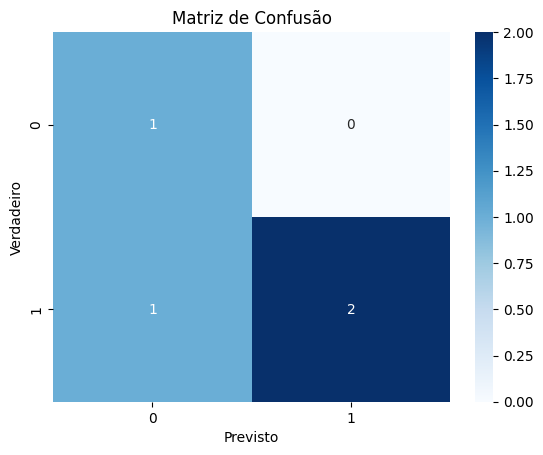


Percentual de acerto para pessoas que pagam o empréstimo: 100.00%
Percentual de acerto para pessoas que não pagam o empréstimo: 66.67%


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Renda': [50000, 60000, 35000, 25000, 80000, 120000, 70000, 22000, 95000, 45000, 62000, 38000, 55000, 72000, 42000, 68000, 59000, 49000],
    'Idade': [25, 35, 45, 20, 55, 30, 40, 23, 50, 33, 28, 42, 30, 35, 29, 31, 27, 38],
    'Divida': [20000, 5000, 15000, 8000, 0, 0, 10000, 3000, 500, 12000, 7000, 18000, 9000, 15000, 8000, 12000, 10000, 6000],
    'Classe': ['Não Paga', 'Paga', 'Não Paga', 'Paga', 'Paga', 'Paga', 'Não Paga', 'Paga', 'Paga', 'Não Paga', 'Paga', 'Paga', 'Paga', 'Paga', 'Não Paga', 'Paga', 'Paga', 'Paga']
}

df = pd.DataFrame(data)

# Separar características (X) e a variável alvo (y)
X = df[['Renda', 'Idade', 'Divida']]
y = df['Classe']

# Divisão dos dados com amostragem estratificada
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar formas dos conjuntos
print("Formas dos conjuntos de dados:")
print(f"Treinamento - X: {X_treinamento.shape}, y: {y_treinamento.shape}")
print(f"Teste - X: {X_teste.shape}, y: {y_teste.shape}")

# Verificar distribuição das classes
print("\nDistribuição das classes no conjunto original:")
print(np.unique(y, return_counts=True))

print("\nDistribuição das classes no conjunto de treinamento:")
print(np.unique(y_treinamento, return_counts=True))

print("\nDistribuição das classes no conjunto de teste:")
print(np.unique(y_teste, return_counts=True))

# Treinamento do modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

# Realização de previsões
previsoes = modelo.predict(X_teste)

# Avaliação do modelo
accuracy = accuracy_score(y_teste, previsoes)
print(f"\nAcurácia do modelo: {accuracy * 100:.2f}%")

# Matriz de confusão
cm = confusion_matrix(y_teste, previsoes)
print("\nMatriz de Confusão:")
print(cm)

# Visualização da matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# Percentual de acerto para cada classe
acerto_paga = cm[0, 0] / (cm[0, 0] + cm[0, 1])
acerto_nao_paga = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(f"\nPercentual de acerto para pessoas que pagam o empréstimo: {acerto_paga * 100:.2f}%")
print(f"Percentual de acerto para pessoas que não pagam o empréstimo: {acerto_nao_paga * 100:.2f}%")
